# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Observation
1. The date of data retrieved is 4/18/2022, on this day, the maximum temperature close to the equator (latitude = 0) area is the highest, and the maximum temperature decreases as the latitude absolute value increases. 
2. There are fewer cities in the southern hemisphere high latitude area (latitude < -60), while more cities in the northern hemisphere with lower temperature. 
3. Lower humidity (< 40%) cities fall into the latitude range between 0 and 60. 

In [57]:
import scipy.stats as st

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [21]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

635

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [41]:
record = 1
set = 1

# set up lists to hold response info
name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

print('Beginning Data Retrieval')
print('-------------------------')

for city in cities: 
    query_url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial"
    response = requests.get(query_url).json()

    # Try to grab the city's information if available
    try: 
        name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        print(f"Processing Record {record} of Set {set} | {response['name']}")
        record += 1
    
    # Handle exceptions for a city not found
    except KeyError:
        print('City not found. Skipping ...')
        set += 1
        record = 1
        pass

print(' ----------------------------- Data Retrieval Complete -----------------------------')
    
    


Beginning Data Retrieval
-------------------------
Processing Record 1 of Set 1 | Angoulême
Processing Record 2 of Set 1 | Fethiye
Processing Record 3 of Set 1 | Mocuba
City not found. Skipping ...
City not found. Skipping ...
Processing Record 1 of Set 3 | Acatlán
Processing Record 2 of Set 3 | La Ronge
Processing Record 3 of Set 3 | Krasnoarmeysk
Processing Record 4 of Set 3 | East London
Processing Record 5 of Set 3 | Nouadhibou
Processing Record 6 of Set 3 | Tuatapere
Processing Record 7 of Set 3 | Plettenberg Bay
Processing Record 8 of Set 3 | Port Lincoln
Processing Record 9 of Set 3 | Port Alfred
City not found. Skipping ...
Processing Record 1 of Set 4 | Itoman
Processing Record 2 of Set 4 | Aripuanã
Processing Record 3 of Set 4 | Mataura
Processing Record 4 of Set 4 | Angoche
Processing Record 5 of Set 4 | Oyama
Processing Record 6 of Set 4 | Mayo
Processing Record 7 of Set 4 | Todos Santos
Processing Record 8 of Set 4 | Atuona
City not found. Skipping ...
Processing Record 1 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [42]:
city_info_dict = {
    "City" : name,
    "Lat" : lat,
    "Lng" : lng,
    "Max Temp" : max_temp,
    "Humidity" : humidity,
    "Cloudiness" : cloudiness,
    "Wind Speed" : wind_speed,
    "Country" : country,
    "Date" : date
}

city_info_df = pd.DataFrame(city_info_dict)
city_info_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Angoulême,45.6500,0.1500,54.21,91,100,3.44,FR,1651211301
1,Fethiye,36.6217,29.1164,62.47,46,1,4.12,TR,1651211302
2,Mocuba,-16.8392,36.9856,67.93,90,62,5.08,MZ,1651211302
3,Acatlán,20.1500,-98.4500,57.72,76,61,2.33,MX,1651211304
4,La Ronge,55.1001,-105.2842,41.25,87,100,6.91,CA,1651211126


In [43]:
city_info_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,5.770000e+02
mean,19.154999,19.459328,62.145061,68.648180,59.727903,8.524437,1.651211e+09
std,32.814576,90.102831,20.065349,22.936415,38.297499,5.642747,1.288742e+02
min,-54.800000,-179.166700,4.730000,1.000000,0.000000,0.000000,1.651211e+09
25%,-7.676600,-62.398900,47.230000,58.000000,20.000000,4.360000,1.651211e+09
50%,20.894700,24.429300,64.450000,73.000000,75.000000,7.490000,1.651211e+09
75%,46.383300,100.335400,77.650000,86.000000,99.000000,11.500000,1.651212e+09
max,78.218600,179.316700,105.890000,100.000000,100.000000,28.810000,1.651212e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [44]:
#  Get the indices of cities that have humidity over 100%.
city_info_df.loc[city_info_df['Humidity'] > 100].index

Int64Index([], dtype='int64')

In [119]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = city_info_df.loc[city_info_df['Humidity'] < 100]
clean_city_data.to_csv('output_data/cities.csv')
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Angoulême,45.6500,0.1500,54.21,91,100,3.44,FR,1651211301
1,Fethiye,36.6217,29.1164,62.47,46,1,4.12,TR,1651211302
2,Mocuba,-16.8392,36.9856,67.93,90,62,5.08,MZ,1651211302
3,Acatlán,20.1500,-98.4500,57.72,76,61,2.33,MX,1651211304
4,La Ronge,55.1001,-105.2842,41.25,87,100,6.91,CA,1651211126


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [138]:
# Define a function to do the plotting, with appropriate parameters
def scatterplot (df, column,ylabel,title,outputpath):
    plt.scatter(df['Lat'], df[column],edgecolors='black')
    plt.xlabel('Latitude')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid()
    plt.savefig(outputpath)
    plt.show()  

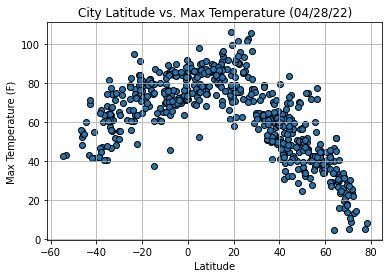

In [139]:
scatterplot(clean_city_data, 
'Max Temp', 
'Max Temperature (F)', 
'City Latitude vs. Max Temperature (04/28/22)',
'output_data/Fig.1_City Latitude vs. Max Temperature.png')

## Latitude vs. Humidity Plot

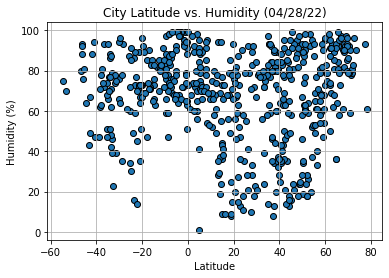

In [140]:
scatterplot(clean_city_data, 
'Humidity', 
'Humidity (%)', 
'City Latitude vs. Humidity (04/28/22)',
'output_data/Fig.2_City Latitude vs. Humidity.png')

## Latitude vs. Cloudiness Plot

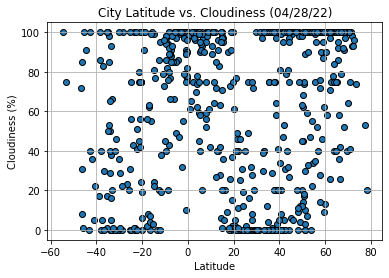

In [141]:
scatterplot(clean_city_data, 
'Cloudiness', 
'Cloudiness (%)', 
'City Latitude vs. Cloudiness (04/28/22)',
'output_data/Fig.2_City Latitude vs. Cloudiness.png')

## Latitude vs. Wind Speed Plot

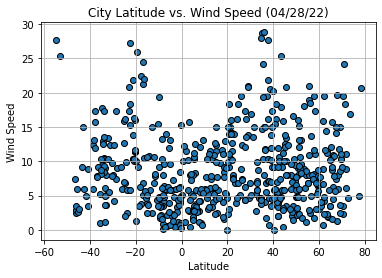

In [142]:
scatterplot(clean_city_data, 
'Wind Speed', 
'Wind Speed', 
'City Latitude vs. Wind Speed (04/28/22)',
'output_data/Fig.2_City Latitude vs. Windspeed.png')

## Linear Regression

In [161]:
# Define a function to plot the scatter plot and linear regression model
def scatter_regression(hemisphere, column, xloc, yloc):

    # Decide if the hemisphere is northern or southern hemisphere
    if hemisphere == 'n':
        df = clean_city_data.loc[clean_city_data['Lat'] > 0]
    if hemisphere == 's':
        df = clean_city_data.loc[clean_city_data['Lat'] < 0]

    corr=round(st.pearsonr(df['Lat'],df[column])[0],2)
    print(f"The r-value is {corr}")
    model = st.linregress(df['Lat'],df[column])

    y_values = df['Lat']*model[0]+model[1]

    plt.scatter(df['Lat'], df[column])
    plt.plot(df['Lat'],y_values,color="red")
    plt.text(s = f"y = {round(model[0],2)}x + {round(model[1],2)}",x = xloc, y = yloc, size = 20, color = 'r')
    plt.xlabel('Latitude')
    plt.ylabel(column)
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.86


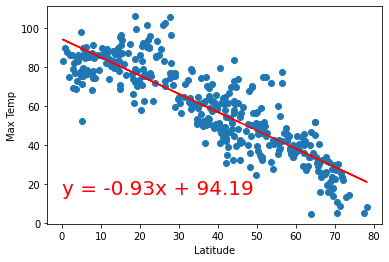

In [162]:
scatter_regression('n', 'Max Temp',0,15)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.63


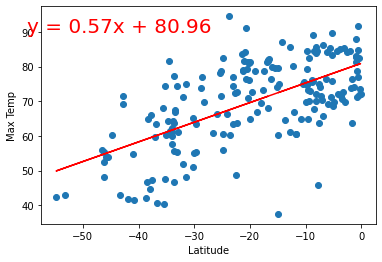

In [166]:
scatter_regression('s','Max Temp', -60, 90)

The high r value indicated a strong correlation between maximum temperature and latitude. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.17


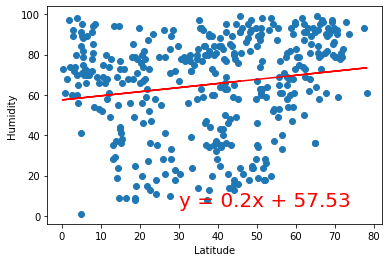

In [167]:
scatter_regression('n','Humidity', 30, 5)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.28


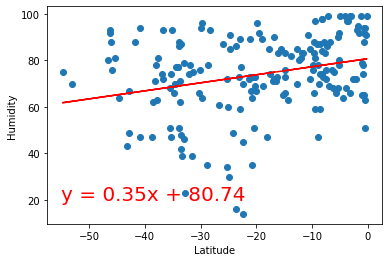

In [168]:
scatter_regression('s','Humidity', -55, 20)


The low r value indicated a weak correlation between humidity and latitude

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.12


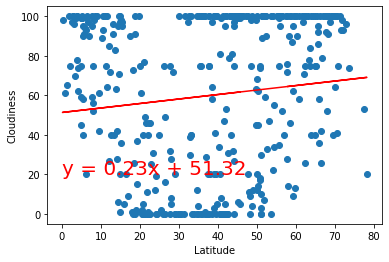

In [169]:
scatter_regression('n','Cloudiness', 0, 20)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.39


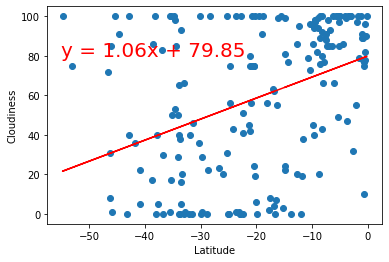

In [171]:
scatter_regression('s','Cloudiness', -55, 80)

The low r value indicated a weak correlation between cloudiness and latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.11


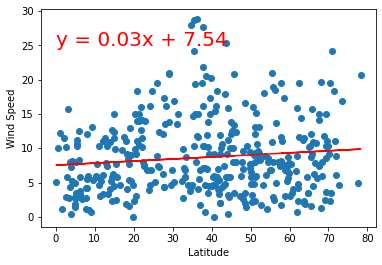

In [172]:
scatter_regression('n','Wind Speed', 0, 25)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.31


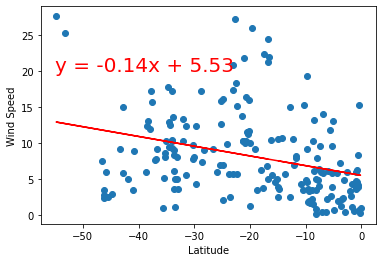

In [173]:
scatter_regression('s','Wind Speed', -55, 20)

The low r value indicated a weak correlation between wind speed and latitude.